In [1]:
# Basic Setup
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [2]:
# Read Data
all_data = pd.read_csv('adult.data', sep=',', header=None)
attributes_names = ['Age', 'Workclass','Fnlwgt','Education','Education_Num','Marital_Status',
                    'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
                    'Hours_Per_Week','Native_Country','Income']
all_data.columns = attributes_names

In [3]:
def rearrange_data(data, corresponding_attributes):
    '''
        Rearrange all data and use integer to represent each attributes and corresponding labels
        Return:
                1. inputs
                2. corresponding outputs
    '''
    num_data = len(data)
    num_attributes = len(attributes_names) - 1
    class_labels = np.zeros(num_data, dtype='int')
    inputs = np.zeros((num_data, num_attributes), dtype='int')  # Initialize data 

    
    for j in range(num_attributes):    # Rearrange inputs
        dic = {}
        cor_index = 0
        for i in range(num_data):
            if j == 1 or j == 3 or 5 <= j <= 9 or j == 13:
                if data[attributes_names[j]][i] not in dic:
                    dic[data[attributes_names[j]][i]] = cor_index
                    cor_index += 1
                inputs[i][j] = dic[data[attributes_names[j]][i]]
            else:
                inputs[i][j] = data[attributes_names[j]][i]
        if len(dic.keys()) > 0:
            corresponding_attributes[j] = dic
    dic = {}
    cor_index = 0
    for i in range(num_data):         # Rearrange class_labels(output)
        if data['Income'][i] not in dic:
            dic[data['Income'][i]] = cor_index
            cor_index += 1
        class_labels[i] = dic[data['Income'][i]]
    return inputs, class_labels, corresponding_attributes

corresponding_attributes = {}
inputs, class_labels, corresponding_attributes = rearrange_data(all_data, corresponding_attributes)
print(inputs)
print(class_labels)
# print(corresponding_attributes)

[[    39      0  77516 ...      0     40      0]
 [    50      1  83311 ...      0     13      0]
 [    38      2 215646 ...      0     40      0]
 ...
 [    58      2 151910 ...      0     40      0]
 [    22      2 201490 ...      0     20      0]
 [    52      6 287927 ...      0     40      0]]
[0 0 0 ... 0 0 1]


In [4]:
# convert inputs back to dataframe and append the class label to the end
class_labels_T = np.array([class_labels])
all_input = np.append(inputs, class_labels_T.T, axis=1)
df = pd.DataFrame(all_input, columns = attributes_names)
# df[:10]

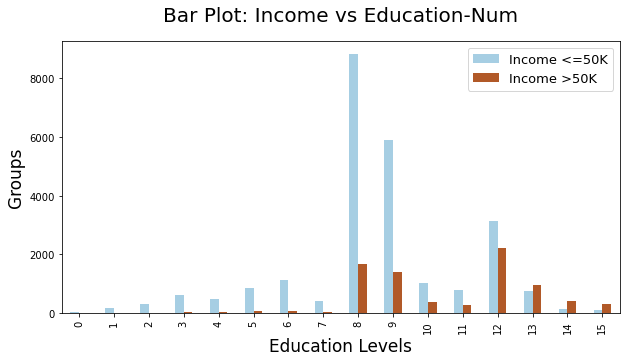

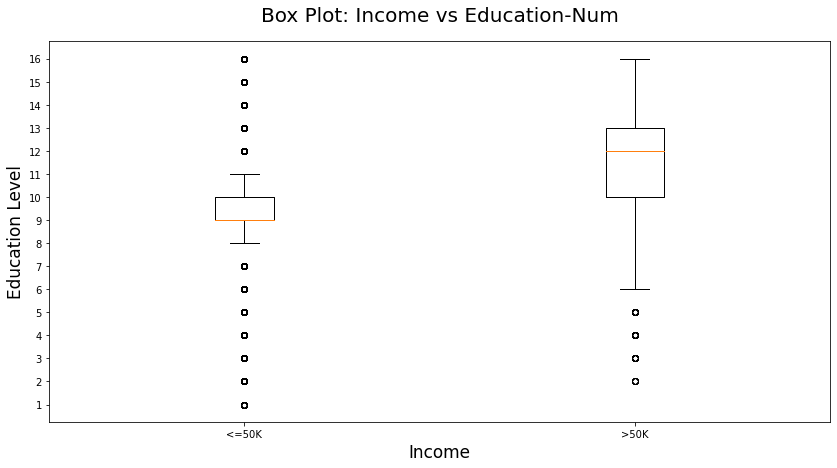

In [22]:
# Plot Group 1 - Income vs Education Level

# Box Plot
# get the education levels and count how many groups are in each level
less = [row[4] for row in all_input if row[-1] == 0]
more = [row[4] for row in all_input if row[-1] == 1]
less_than_50k = collections.Counter(less)
more_than_50k = collections.Counter(more)

# fill the dictionary if there exists key(s) that has(have) 0 value
for i in range(1, 17):
    if i not in less_than_50k:
        less_than_50k[i] = 0
for i in range(1, 17):
    if i not in more_than_50k:
        more_than_50k[i] = 0
        
# extract the values of groups
less_than_50k = sorted(less_than_50k.items(), key=lambda x: x[0])
more_than_50k = sorted(more_than_50k.items(), key=lambda x: x[0])
less_than_50k_values = [value for key, value in less_than_50k]
more_than_50k_values = [value for key, value in more_than_50k]

# plot the graph
df = pd.DataFrame({'Income <=50K': less_than_50k_values, 'Income >50K': more_than_50k_values})
df.plot(kind="bar", colormap='Paired', figsize=(10,5))

plt.title("Bar Plot: Income vs Education-Num", fontsize=20, pad=20)
plt.legend(loc=1, prop={'size': 13})
plt.xlabel("Education Levels", fontsize=17)
plt.ylabel("Groups", fontsize=17)
plt.show()

# Box-Whisker Plot
df_less_than_50k = pd.DataFrame(less, columns=["<=50K"])
df_more_than_50k = pd.DataFrame(more, columns=[">50K"])

# plot and show the range of education levels of two different income groups
fig, ax = plt.subplots(figsize=(14,7))
dataset = [df_less_than_50k["<=50K"], df_more_than_50k[">50K"]]
labels = ["<=50K",">50K"]
ax.boxplot(dataset, labels=labels)
plt.yticks(range(1,17,1))
plt.xlabel("Income", fontsize=17)
plt.ylabel("Education Level", fontsize=17)
plt.title("Box Plot: Income vs Education-Num", fontsize=20, pad=20)
plt.show()